In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tests.test_competing_risks_model import *

%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'tests.test_competing_risks_model'

# Simple competing risks example

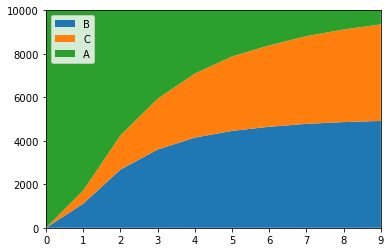

,id,sex,transition,T
0,0,0,1,5.0
1,1,0,1,3.0
2,2,1,1,4.0
3,3,1,1,2.0
4,4,0,2,4.0


In [2]:
data = create_test_data(N=10_000)
stackplot(data)
data.head()

# Start some tests

In [6]:
from pymsm.competing_risks_model import CompetingRisksModel

crm = CompetingRisksModel()

In [7]:
crm.fit(df=data, duration_col='T', event_col='transition', cluster_col='id')

[1 2]
>>> Fitting Transition to State: 1, n events: 4988
>>> Fitting Transition to State: 2, n events: 5012


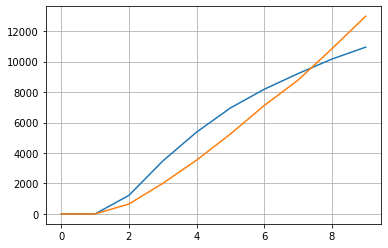

In [21]:
times = np.arange(10)
s1 = 10_000 * crm.predict_CIF(predict_at_t=times, sample_covariates=[0], failure_type=1)
s2 = 10_000 * crm.predict_CIF(predict_at_t=times, sample_covariates=[1], failure_type=2)

plt.plot(s1)
plt.plot(s2)
plt.grid()


In [16]:
c2 = crm.event_specific_models[2].cox_model
c2.baseline_survival_

,baseline survival
1.0,0.999900
1.0,0.999900
1.0,0.999900
1.0,0.999800
1.0,0.999800
...,...
29.0,0.001789
30.0,0.001391
33.0,0.000992
36.0,0.000597


In [19]:
s2

array([0.        , 0.        , 0.06504891, 0.2005427 , 0.35312683,
       0.5246856 , 0.71178553, 0.87853283, 1.08428362, 1.29817481,
       1.53238038, 1.76834069, 2.00511567, 2.22551864, 2.45158653,
       2.69392042, 2.95846736, 3.1587964 , 3.36596824, 3.602471  ,
       3.93870553, 4.19246547, 4.49672364, 4.67016543, 4.77010637,
       4.94256141, 5.32216611, 5.65008411, 5.95333076, 6.14939509,
       6.39412612, 6.39412612, 6.39412612, 6.72277679, 6.72277679,
       6.72277679, 7.2157528 , 7.2157528 , 7.2157528 , 8.20170481,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan])